<div style="border:solid green 2px; padding: 20px">
    
<b>Евгений, привет!</b> Мы рады тебя видеть на территории код-ревьюеров. Ты проделал большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У тебя неограниченное количество попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

<div class="alert alert-info">  Привет, Александр!

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Евгений, рад тебя видеть =)
</div>

# Исследование объявлений о продаже квартир

<b>Цель исследования</b> - установить параметры, влияющие на рыночную стоимость объектов недвижимости.

<b>Исходные данные</b> - данные сервиса «Яндекс.Недвижимость» (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет).

<b>Вопросы, интересующие заказчика:</b>

 - Сколько времени занимает продажа квартиры. Когда продажу можно назвать быстрой / долгой
 - Какие факторы больше всего влияют на стоимость квартиры
 - Какая средняя стоимость квартиры в 10 населённых пунктов с наибольшим числом объявлений
 - Какие факторы влияют на стоимость квартиры в центре Санкт-Петербурга. Насколько они отличаются от данных в целом по городу

# Содержание



  1.  Изучение данных из файла
  2.  Предобработка данных
  3.  Рассчёты и добавление результатов в таблицу
  4.  Исследовательский анализ данных
    - 4.1  Изучение основных параметров
    - 4.2  Изучение времени продажи квартиры
    - 4.3  Определение факторов, влияющих на стоимость квартиры
    - 4.4  Сравнение средней стоимости квадратного метра в топ-10 городов
    - 4.5  Определяем как стоимость объектов зависит от расстояния до центра города.
  5.  Общий вывод

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте).
</div>

### Изучение данных из файла 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 100



data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В некоторых столбцах <b>неправильный формат данных и огромное количество пропусков:</b>

first_day_exposition - object - должен быть тип datetime<br>
ceiling_height - пропуски<br>
floors_total - должен быть тип int, т.к. количество этажей - целое значение + пропуски<br>
is_apartment - должен быть тип bool + пропуски<br>
living_area - пропуски<br>
kitchen_area - пропуски<br>
balcony - пропуски<br>
locality_name - пропуски<br>
airports_nearest - пропуски<br>
cityCenters_nearest - пропуски<br>
parks_around3000 - тип должен быть int + пропуски<br>
parks_nearest - пропуски<br>
ponds_around3000 - тип должен быть int + пропуски<br>
ponds_nearest - пропуски<br>
days_exposition - тип должен быть int + пропуски

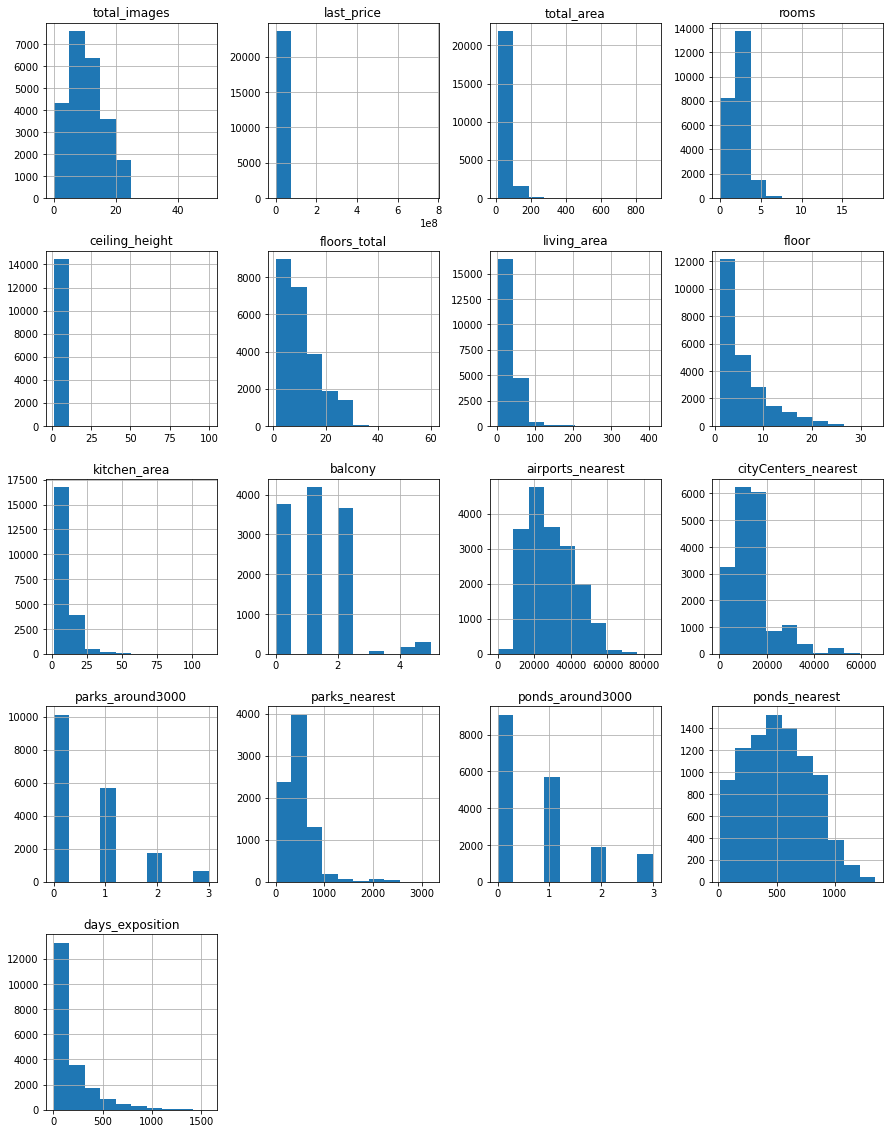

In [2]:
data.hist(figsize=(15, 20));

Очень много пропусков в таблице. Также в данных есть аномальные значения, например, высота потолков 100 метров, общая площадь 900 квадратных метров, кухня 112 метров.

<div class="alert alert-block alert-success">✔️
    
__Комментарий от ревьюера №1__
    
Отлично! Первый взгляд на данные есть

### Предобработка данных

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверить колличество пропусков в % можно вот так: 
    
    
    pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

Приводим в целочисленный тип <b>стоимость квартиры

In [3]:
data['last_price'] = data['last_price'].astype(int)

  <br>

Приводим к типу даты <b>дату публикации

In [4]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

  <br>

<b>Апартаменты</b> - мало кому известная штука. Их владельцы точно знают, что это апартаменты, а у кого их нет, не станут указывать тип помещения - апартаменты. Поэтому, скорее всего, апартаментов действительно мало. Заполняем False.

In [5]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

  <br>

Приводим в целочисленный тип количество <b>балконов</b>. Заменяем пропущенные значения на 0, т.к. отсутствие в объявлении балкона - это явное его отсутствие в квартире.

In [6]:
data['balcony'] = data['balcony'].fillna(value=0).astype(int)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен, если пропуск - вероятнее всего балкон отсутствует

  <br> 
 

<b>Удаляем записи, где отсутствует локация и этажность

In [7]:
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верно, если пропусков меньше 5-10% их лучше сразу удалить, дабы сэкономить время

  <br> 
 

Приводим <b>этажность</b> к целочисленному типу

In [8]:
data['floors_total'] = data['floors_total'].astype(int)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Столбцы имеют корректный тип данных
</div>

  <br> 
 

Заполним пропуски в <b>высоте потолков</b> по медиане для типичной этажности. Для этого составим таблицу типичной этажности с медианой потолков.

In [9]:
ceiling_medians = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
ceiling_medians.head()

,median,count
floors_total,,
1,2.80,10
2,2.70,213
3,2.80,399
4,3.00,787
5,2.55,3662


Заменяем значения высоты потолков на общую медиану для отсутствующих значений этажности дома

In [10]:
for floor in ceiling_medians.index:
    data.loc[(data['floors_total'].isna()) | 
             ((data['floors_total'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)), 
             'ceiling_height'] = data['ceiling_height'].describe()[5]

Медианы из сгруппированной таблицы вставляем на места пропущенных значений высоты потолков для дома соответствующей этажности

In [11]:
for floor in ceiling_medians.index:
    data.loc[(data['ceiling_height'].isna()) & 
             (data['floors_total'] == floor), 
             'ceiling_height'] = ceiling_medians.loc[floor, 'median']

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что используешь собственные функции

  <br> 
 

Заменяем пустые значения <b>жилой площади</b> и <b>площади кухни</b>. Посчитаем соответствующие коэффициенты. Для жилой площади посчитаем медианное значение отношения жилой площади к общей, для кухни - площадь кухни к общей.

In [12]:
living_ratio = data['living_area'].median() / data['total_area'].median()
kitchen_ratio = data['kitchen_area'].median() / data['total_area'].median()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

  <br> 
 

В <b>airports_nearest</b> (если оно будет не NaN) заполним все пропуски медианами значений из других строк где совпадает locality_name

In [13]:
loc_median = data.groupby('locality_name')['airports_nearest'].median().sort_values()
loc_median = loc_median.dropna()

# функция для присваивания пропуску значения медианы
def med_insert(loc_dist):
    if loc_dist not in loc_median:
        return np.nan
    return loc_median[loc_dist]

# заменяем
data.loc[data['airports_nearest'].isna()==True, 'airports_nearest'] = data['locality_name'].apply(med_insert)

  <br> 
 

Также все пропуски в <b>cityCenters_nearest</b> заполним медианами значений  (если оно будет не NaN) из других строк где совпадает locality_name

In [14]:
loc_median = data.groupby('locality_name')['cityCenters_nearest'].median().sort_values()
loc_median = loc_median.dropna()

# функция для присваивания пропуску значения медианы
def med_insert(loc_dist):
    if loc_dist not in loc_median:
        return np.nan
    return loc_median[loc_dist]

# заменяем
data.loc[data['cityCenters_nearest'].isna()==True, 'cityCenters_nearest'] = data['locality_name'].apply(med_insert)

In [15]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5432
cityCenters_nearest      5432
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Оставшиеся пропущенные значения (5432) в столбце cityCenters_nearest заполнить не представляется возможным, так как если заполнить медианой или средней по всему столбцу это очень сильно может повлиять на анализ и сильно исказить результаты и выводы. Поэтому оставим все как есть, и будем выполнять анализ с таким количеством пропусков.

  <br>

Приводим в целочисленный тип <b>количество парков</b>. Заменяем пропущенные значения на 0

In [16]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)

  <br>

Посмотрим на распределение данных в <b>parks_nearest

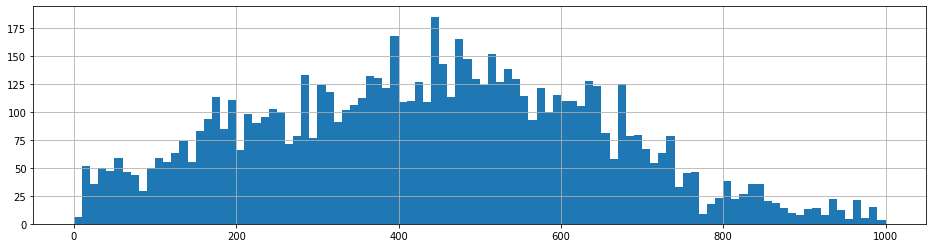

In [17]:
data['parks_nearest'].hist(figsize=(16,4), bins=100, range=(0,1000));

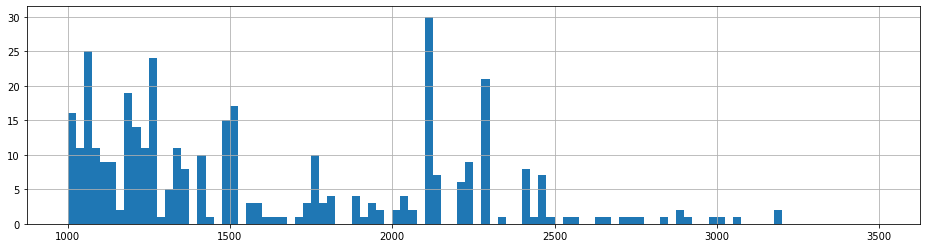

In [18]:
data['parks_nearest'].hist(figsize=(16,4), bins=100, range=(1000,3500));

Значения распределены равномерно. Большая часть меньше 3000. Удалять ничего небудем.

Будем заполнять пропуски по аналогии со столбцом cityCenters_nearest и airports_nearest по соответствию населенному пункту

In [19]:
loc_median = data.groupby('locality_name')['parks_nearest'].median().sort_values()
loc_median = loc_median.dropna()

# функция для присваивания пропуску значения медианы
def med_insert(loc_dist):
    if loc_dist not in loc_median:
        return np.nan
    return loc_median[loc_dist]

# заменяем
data.loc[data['parks_nearest'].isna()==True, 'parks_nearest'] = data['locality_name'].apply(med_insert)

Проверим сколько осталось пропусков

In [20]:
data['parks_nearest'].isna().sum()

5986

Было пропусков 15535 осталось 5996 - большую часть значений заполнили, теперь со значениями около 18 тысяч. Остальные не заполняем по аналогии с другими столбцами с расстояниями.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Да, верный подход

  <br>

Приводим в целочисленный тип <b>количество прудов</b>. Заменяем пропущенные значения на 0

In [21]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

  <br>

Посмотрим на распределение данных в <b>ponds_nearest

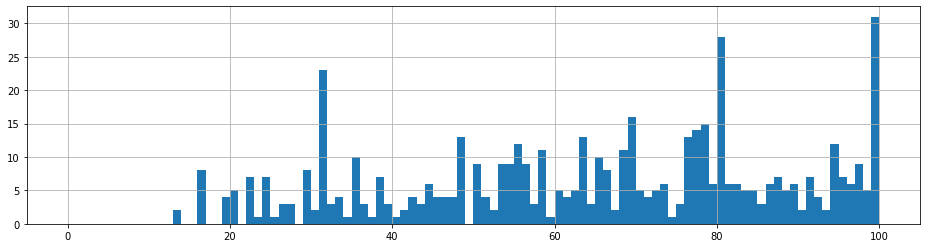

In [22]:
data['ponds_nearest'].hist(figsize=(16,4), bins=100, range=(0,100));

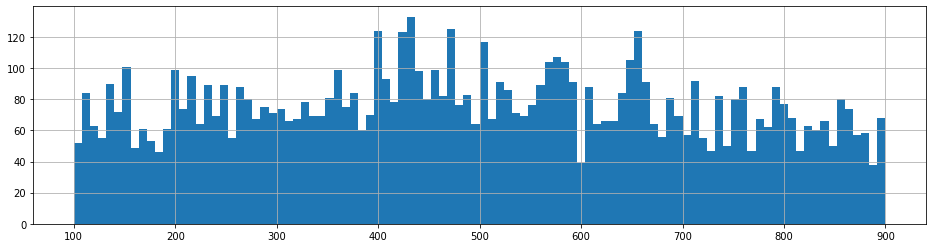

In [23]:
data['ponds_nearest'].hist(figsize=(16,4), bins=100, range=(100,900));

Выбросов вообще нет. Заполняем по аналогии с airports_nearest , cityCenters_nearest и parks_nearest.

In [24]:
loc_median = data.groupby('locality_name')['ponds_nearest'].median().sort_values()
loc_median = loc_median.dropna()

# функция для присваивания пропуску значения медианы
def med_insert(loc_dist):
    if loc_dist not in loc_median:
        return np.nan
    return loc_median[loc_dist]

# заменяем
data.loc[data['ponds_nearest'].isna()==True, 'ponds_nearest'] = data['locality_name'].apply(med_insert)

  <br>

Обработаем данные в <b>days_exposition</b>, привязав пропуски к населённым пунктам. Попробуем заполнить пропуски медианами по каждому населенному пункту.

In [25]:
loc_median = data.groupby('locality_name')['days_exposition'].median().sort_values()
loc_median = loc_median.dropna()

# функция для присваивания пропуску значения медианы
def loc_med_insert(loc_name):
    if loc_name not in loc_median:
        return np.nan
    return loc_median[loc_name]

# заменяем
data.loc[data['days_exposition'].isna()==True, 'days_exposition'] = data['locality_name'].apply(loc_med_insert)

Проверим сколько осталось пропусков и найдем медианцу столбца

In [26]:
print("Кол-во пропусков =", data['days_exposition'].isna().sum())
print()
med_day_exp = data['days_exposition'].median()
print('Медиана всего столбца =', med_day_exp)

Кол-во пропусков = 80

Медиана всего столбца = 95.0


Заполним оставшиеся пропуски медианой всего столбца и поменяем тип данных на int

In [27]:
data['days_exposition'] = data['days_exposition'].fillna(med_day_exp)
data['days_exposition'] = data['days_exposition'].astype(int)

   <br>

Определим неявные дубликаты в <b>locality_name

Для начала выведем уникальные значения столбца в алфавитном порядке

In [28]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Видно, что слово посёлок написано в 2 вариантах с "ё" и "е". Заменим все "ё" на "е" во всем столбце.

In [29]:
import re
for ind_str in data.loc[(data['locality_name'].isna()==False),'locality_name'].index:    
    loc_str = data.loc[ind_str, 'locality_name']
    if ('ё' or 'Ё') in loc_str:
        loc_str = re.sub('ё', 'е', loc_str)
        loc_str = re.sub('Ё', 'Е', loc_str)
    data.loc[ind_str, 'locality_name'] = loc_str

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличный код

Также в данных есть городской поселок и поселок городского типа. Приведём всё к поселок городского типа.

In [30]:
for ind_str in data.loc[(data['locality_name'].isna()==False),'locality_name'].index:    
    loc_str = data.loc[ind_str, 'locality_name']
    if 'городской поселок' in loc_str:
        loc_str = re.sub('городской поселок', 'поселок городского типа', loc_str)
        data.loc[ind_str, 'locality_name'] = loc_str
        

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Можно например вот так:
    
    df = df.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

    len(df.locality_name.unique())
    
</div>

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

<br>

<b>Обработаем аномальные значения высоты потолков

In [32]:
data['ceiling_height'].describe()

count   23,565.00
mean         2.74
std          1.00
min          1.00
25%          2.55
50%          2.65
75%          2.75
max        100.00
Name: ceiling_height, dtype: float64

Отсортируем данные, удалив строки, где высота потолков более 5 метров и менее 2.

In [33]:
data = data.query('2 < ceiling_height <= 5')

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Отсутствует проверка на явные дубликаты, поправишь, пожалуйста?
    
---
    
Так же отсутствует вывод после раздела. Поправишь, этот момент в проекте?
</div>

<div class="alert alert-info">Проверим данные на явные дубликаты

In [34]:
display(data.duplicated().sum())

0

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Проверка на дубликаты - основа предобработки данных
</div>

<div class="alert alert-info"> <b>ВЫВОД:</b><br><br> Полученные данные содержали очень большое количество пропусков, которые появились частично по вине заполнявших эти данные (как, например, высота потолков в 32 и 27 метров), частично, видимо, потерявшиеся при автоматической выгрузке из базы данных. <br><br>Данные были обработаны: пропуски, где возможно, заполнены, неявные дубликаты исправлены.<br><br>В дальнейшем, для получения более точных данных, рекомендуется доработать систему заполнения данных пользователями для того, чтобы было невозможно ввести некорректные данные. Например, сделать выпадающий список с типом населённого пункта и сделать его выбор обязательным. При указании типа помещения "квартира" сделать обязательным указание площади кухни, наличие балкона и высоты потолков, общей и жилой площади.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__
    
Второй раздел сделан хорошо. Проверены основные возможные проблемы в данных.

<br>



### Рассчёты и добавление результатов в таблицу

Добавляем столбец со стоимостью квадратного метра (sqm_price) и приводим его в целочисленный тип

In [35]:
data['sqm_price'] = data['last_price'] / data['total_area']
data['sqm_price'] = data['sqm_price'].astype(int)

<br>

Добавляем столбцы дня недели, месяца и года

In [36]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет на будущие работы: обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
    
Вот хорошая статья на этот счёт: 
    
    https://pythobyte.com/how-to-work-with-dates-and-times-in-python-0a176355/
    
    и
    
    https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64
</div>

<div class="alert alert-info"> Понял, спасибо!

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Этот метод нужен для визуализации динамики по неделям, месяцам или годам (смотря какой метод выберешь)
    
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>

<br>

Создаём функцию для заполнения нового столбца с типом этажа

In [37]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

# и выполняем     
data['floor_type'] = data.apply(floor_group, axis=1)

<br>

Добавим столбец с расстоянием до центра города в километрах с округлением до целого.

In [38]:
data['cityCenters_km'] = (data['cityCenters_nearest']/1000).round()

<br>

Проверим данные:

In [39]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_type,cityCenters_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,95,120370,3,3,2019,другой,16.00
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,False,False,False,11.00,2,поселок Шушары,"12,817.00","18,603.00",0,NaN,0,584.50,81,82920,1,12,2018,первый,19.00
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558,92785,3,8,2015,другой,14.00
3,0,64900000,159.00,2015-07-24,3,2.60,14,91.73,9,False,False,False,27.82,0,Санкт-Петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424,408176,4,7,2015,другой,7.00
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121,100000,1,6,2018,другой,8.00


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Этот раздел выполнен качественно
</div>

<br>

### Исследовательский анализ данных

   #### Изучение основных параметров

Построим гистограмы основых параметров объектов

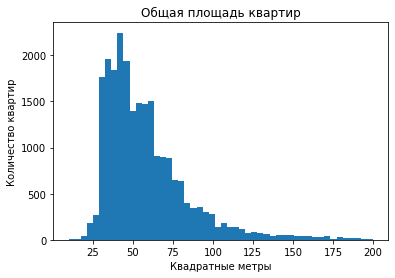

Наибольшие по площади варианты:
19540   900.00
12859   631.20
3117    631.00
15651   618.00
5358    590.00
4237    517.00
8018    507.00
15016   500.00
5893    500.00
12401   495.00
Name: total_area, dtype: float64
Наибольшие по площади варианты:


In [40]:
plt.hist(data['total_area'], bins=50, range=(10,200))
plt.title('Общая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))
print('Наибольшие по площади варианты:')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что используешь метод range() для определения пиковых значений
</div>

Большинство квартир - менее 100 квадратных метров, больше площадь практически не встречается. В подборке есть несколько очень больших и странных вариантов с площадью более 200 квадратных метров - это, скорее всего, частные дома. При этом самая большая площадь равняется 900 квадратных метров, а самая маленькая - менее 15.

<br>

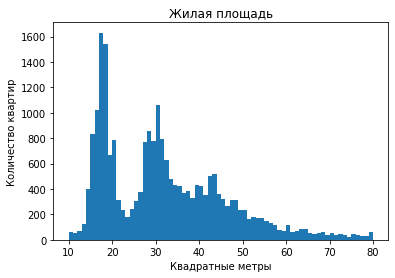

Наибольшие по жилой площади варианты:
19540   409.70
5358    409.00
3117    364.04
12401   347.50
4237    332.00
12859   322.30
660     312.50
8018    301.50
14088   300.00
5893    288.46
Name: living_area, dtype: float64


In [41]:
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по жилой площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))

Самые распространённые варианты с жилой площадью от 10 до 50 метров. После 80 метров встречаются единичные случаи с огромными значениями. Опять же, скорее всего, - это частные дома. Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.

<br>

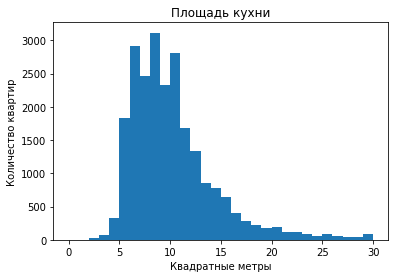

Наибольшие по площади кухни варианты:
19540   112.00
20215   107.00
2489    100.70
5358    100.00
16239    93.20
16797    93.00
15016    87.50
10867    87.20
9826     86.47
492      77.00
Name: kitchen_area, dtype: float64


In [42]:
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

Самые распространённые кухни - от 5 до 15 метров. Больше 20 метров кухни практически не встречаются. Больше 30 - единичные случаи.

<br>

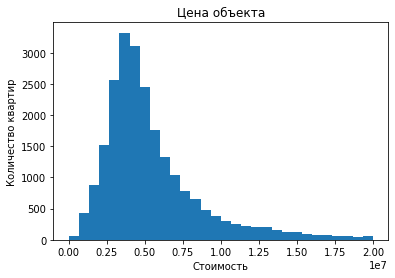

Наибольшие по цене варианты:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int64


In [43]:
plt.hist(data['last_price'], bins=30, range=(0, 20000000))
plt.title('Цена объекта')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))

В основном стоимость квартир - порядка 5 миллионов. Больше 20 миллионов вариантов мало и они выглядят очень странно и некоторые - на порядок дороже.

<br>

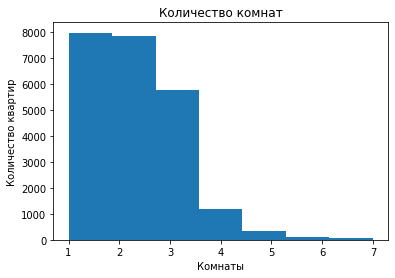

Наибольшие по числу комнат варианты:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
9688     11
648      11
4149     10
18891    10
Name: rooms, dtype: int64


In [44]:
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))

В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят странно и подозрительно. Даже при объединении нескольких квартир в одну это подозрительно. Возможно, это отдельный дом.

<br>

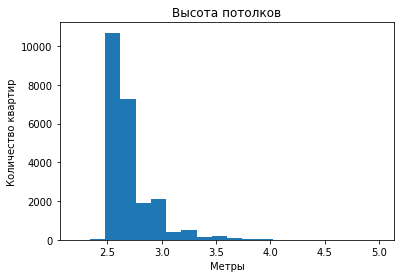

Наибольшие по высоте потолков варианты:
1053    5.00
21923   4.90
2802    4.80
1300    4.70
19142   4.70
12401   4.65
9783    4.50
10159   4.50
2823    4.50
3067    4.50
Name: ceiling_height, dtype: float64


In [45]:
plt.hist(data['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Больше 4 метров высота потолков выглядит подозрительно. Есть значения в 27 метров (высота 9-этажного дома) - это может быть ошибкой данных и реальная высота 2,7 метра.

<br>

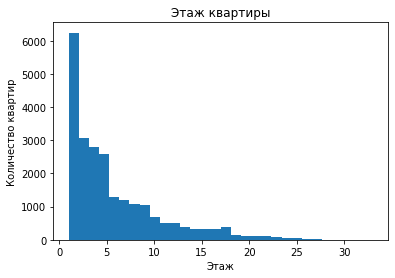

Наибольшие по расположению на этаже варианты:
18218    33
11575    32
18629    31
1917     30
11079    29
6157     27
8496     27
2629     27
4091     27
13276    27
Name: floor, dtype: int64


In [46]:
plt.hist(data['floor'], bins=30)
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по расположению на этаже варианты:')
print(data['floor'].sort_values(ascending=False).head(10))

Основная масса квартир - до 10 этажа, что может говорить о преобладании объявлений на вторичном рынке, т.к. раньше не часто строили дома выше 10 этажей, особенно в Питере. Очень большое количество кварир - до 5 этажа, а лидеры по количеству продаж - 1 и 2 этажи.

<br>

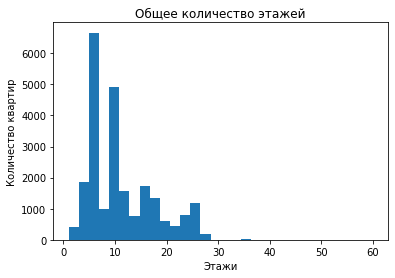

Наибольшие по этажности варианты:
2253     60
16731    52
11079    36
9186     35
18218    35
5749     35
1060     35
21599    35
12888    35
8496     35
Name: floors_total, dtype: int64


In [47]:
plt.hist(data['floors_total'], bins=30)
plt.title('Общее количество этажей')
plt.xlabel('Этажи')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по этажности варианты:')
print(data['floors_total'].sort_values(ascending=False).head(10))

Как и предполагалось, наиболее представленные квартиры находятся в старой застройке: пяти- и девяти-десятиэтажках. Однако есть и этажность выше 30, что является единичными случаями. Интересно, если ли в Питере 60-этажные дома? 

<br>

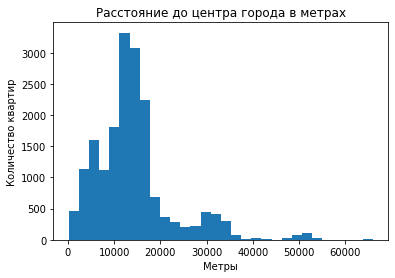

Наибольшие по удалению варианты:
9640    65,968.00
5340    65,952.00
577     65,764.00
20746   65,105.00
5218    64,857.00
18884   62,706.00
2974    62,454.00
16569   61,495.00
23123   60,223.00
4441    59,626.00
Name: cityCenters_nearest, dtype: float64


In [48]:
plt.hist(data['cityCenters_nearest'], bins=30)
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по удалению варианты:')
print(data['cityCenters_nearest'].sort_values(ascending=False).head(10))

Квартир в центре населённых пунктов продаётся не так много, как более удалённых. При этом, границы Питера не такие большие, чтобы данные выходили за 20 и даже 30км от центра города. Что-то здесь неладно и явно необходимо доработать данные, превышающие 20км.

<br>

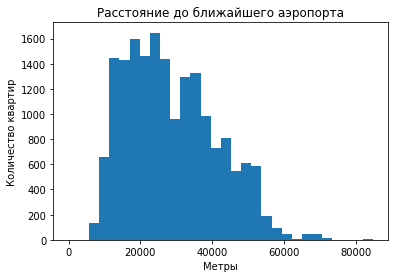

Наибольшие по удалению от аэропорта варианты:
9640    84,869.00
5340    84,853.00
577     84,665.00
20746   84,006.00
5218    83,758.00
18884   81,607.00
2974    81,355.00
4441    78,527.00
939     75,646.00
376     73,827.00
Name: airports_nearest, dtype: float64


In [49]:
plt.hist(data['airports_nearest'], bins=30)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по удалению от аэропорта варианты:')
print(data['airports_nearest'].sort_values(ascending=False).head(10))

Здесь данные укладываются в нормальное распределение. Более 80км до аэропорта - вполне себе нормальное расстояние для областных населенных пунктов.

<br>

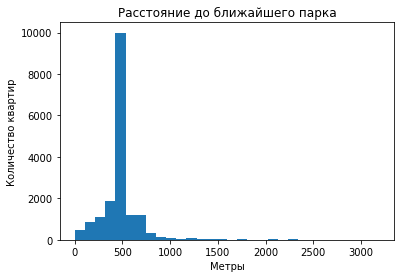

Наибольшие по удалению от ближайшего парка варианты:
19430   3,190.00
10959   3,190.00
1590    3,064.00
19208   3,013.00
23080   2,984.00
2659    2,905.00
1860    2,888.00
7855    2,880.00
3865    2,847.00
22003   2,768.00
Name: parks_nearest, dtype: float64


In [50]:
plt.hist(data['parks_nearest'], bins=30)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по удалению от ближайшего парка варианты:')
print(data['parks_nearest'].sort_values(ascending=False).head(10))

Подавляющее большинство квартир рядом с парком расположены в 1 километре от дома. Однако, есть и такие квартиры, где парки располагаются более чем в получасе ходьбы от дома.

<br>

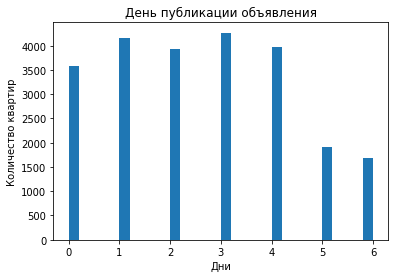

In [51]:
plt.hist(data['weekday'], bins=30)
plt.title('День публикации объявления')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()


Как видно, в субботу и особенно в воскресенье объявлений о продаже квартир подаётся гораздо меньше, чем в будние дни.

<br>

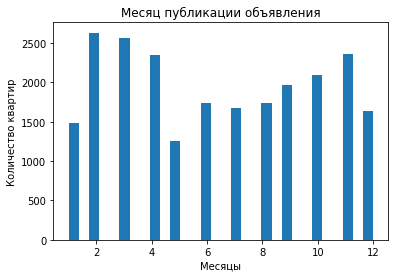

In [52]:
plt.hist(data['month'], bins=30)
plt.title('Месяц публикации объявления')
plt.xlabel('Месяцы')
plt.ylabel('Количество квартир')
plt.show()

Май, декабрь и январь - самые праздничные дни в нашей стране, поэтому и деловая активность гораздо ниже, чем в другие месяцы. Также видна просадка по летним месяцам - перидом отпусков.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

В мае не до продаж, все на огородах =)
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Нет решения по типу этажа. Поправь, пожалуйста
</div>

<div class="alert alert-info">Новый столбец - категории этажа: первый, последний, другой 


In [53]:
data['cat_floor'] = np.nan 

def floor_insert(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['cat_floor'] = data.apply(floor_insert, axis=1)


<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Немного не так, нам нужно визуализировать гистограммы по типу этажа.
</div>

#### Изучение времени продажи квартиры

In [54]:
print('Время продажи (медиана):', round(data['days_exposition'].median()))
print('Время продажи (среднее):', round(data['days_exposition'].mean()))

Время продажи (медиана): 95
Время продажи (среднее): 170


Гистограма времени продажи

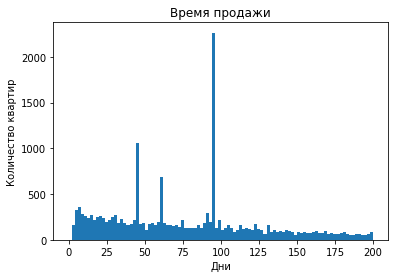

In [55]:
plt.hist(data['days_exposition'], bins=100, range=(0, 200))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

На графике видно несколько пиков, изучим данные

In [56]:
data['days_exposition'].value_counts()

95      2211
45       923
60       544
7        236
90       221
        ... 
1112       1
1080       1
1064       1
1032       1
1391       1
Name: days_exposition, Length: 1139, dtype: int64

Изучаем значения срока продажи

In [57]:
data['days_exposition'].describe()

count   23,514.00
mean       169.96
std        206.96
min          1.00
25%         45.00
50%         95.00
75%        200.00
max      1,580.00
Name: days_exposition, dtype: float64

Отфильтруем данные от аномалий и запишем их в новый датафрейм good_data

In [58]:
good_data = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 95')

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Я бы не советовал удалить эти аномалии:
    
Тут важно порассуждать как аналитик, почему именно 45 и 60 дней? С чем это связано?
    
Эти аномалии очень похожи на техническую особенность самой платформы: вероятнее, в эти дни платформа автоматически убирает объявления, если пользователь его не продлил
</div>

<div class="alert alert-info"> Понял

Построим новую гистограмму

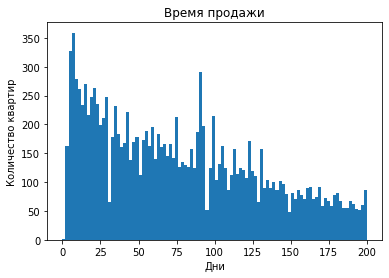

In [59]:
plt.hist(good_data['days_exposition'], bins=100, range=(0, 200))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

Данные стали гораздо более чистыми

In [60]:
good_data['days_exposition'].describe()

count   19,629.00
mean       188.80
std        221.46
min          1.00
25%         46.00
50%        109.00
75%        242.00
max      1,580.00
Name: days_exposition, dtype: float64

In [61]:
good_data['days_exposition'].value_counts()

7       236
90      221
4       174
3       160
5       154
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1135, dtype: int64

<b>Вывод

Медианное время продажи в очищенных данных выросло с 95 до 109 дней. Среднее время продажи было 169 дней, стало 188. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 46 дней и меньше. Долгой продажей - 242 дня (8 месяцев) и дольше.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Да, до 1.5 месяцев можно считать быстрой продажей
</div>

<br>

<b> Какие факторы больше всего влияют на общую (полную) стоимость объекта?

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Отсутствуют шаги 4.3 - 4.5 Ошибка при выгрузке, или ты не знаешь с чего начать? Если возникают трудности, то всегда можешь обратиться к наставнику по проектам, он обязательно поможет в режиме диалога
</div>

<div class="alert alert-info">ВОт же задница.... Работа была полностью выполнена, финальный вывод оформлен... Прости, т.к. времени нет, особо заморачиваться с оформлением текста не буду - времени нет.... 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Это нормальная практика. Лучше перед отправкой проекта сохранить ipynb файл
</div>

<div class="alert alert-info"> Для вычисления зависимости цены от факторов, создадим функцию корреляции

In [62]:
def corr1(column):
    print('Корелляция цены от',column , data['last_price'].corr(data[column]))
    data.plot(x=column, y='last_price', kind='scatter', grid=True, figsize=(14,7), alpha=0.5);


Зависимость от общей площади

Корелляция цены от total_area 0.6519978657739245


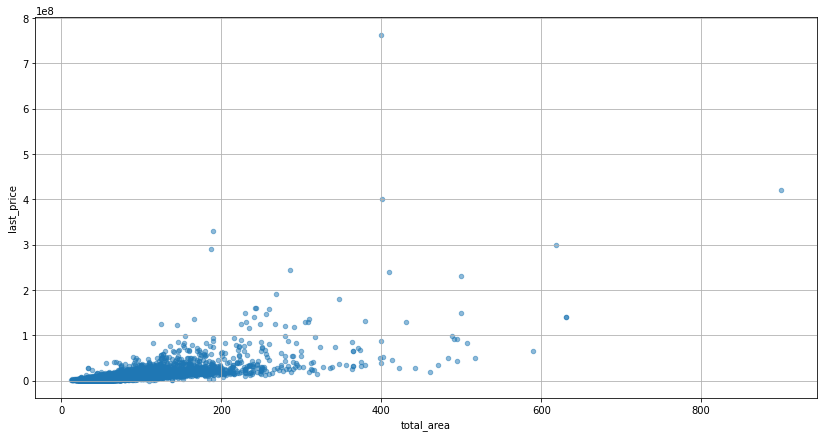

In [63]:
corr1('total_area')

Из графика видно , что зависимость цены от площади есть, но она не такая уж сильная. При возрастании площади и цена возрастает

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верная интерпретация значений корреляции Пирсона. Ты молодец =)
</div>

Зависимость от жилой площади

Корелляция цены от living_area 0.5830209552841431


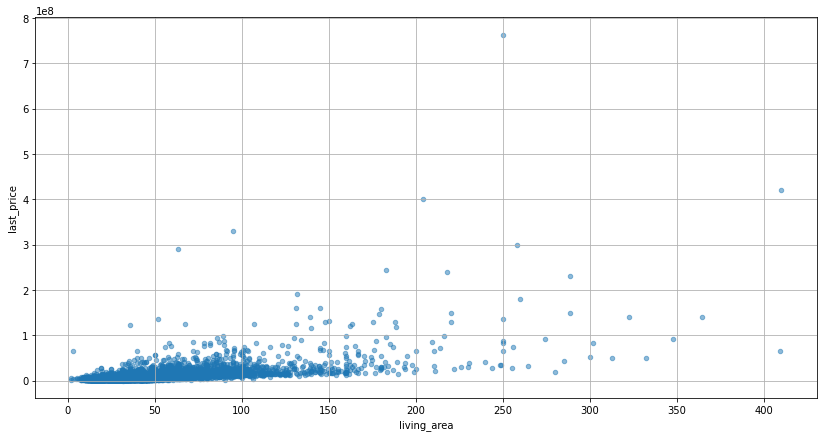

In [64]:
corr1('living_area')

Корреляция меньше

Зависимость от площади кухни

Корелляция цены от kitchen_area 0.5121247717016023


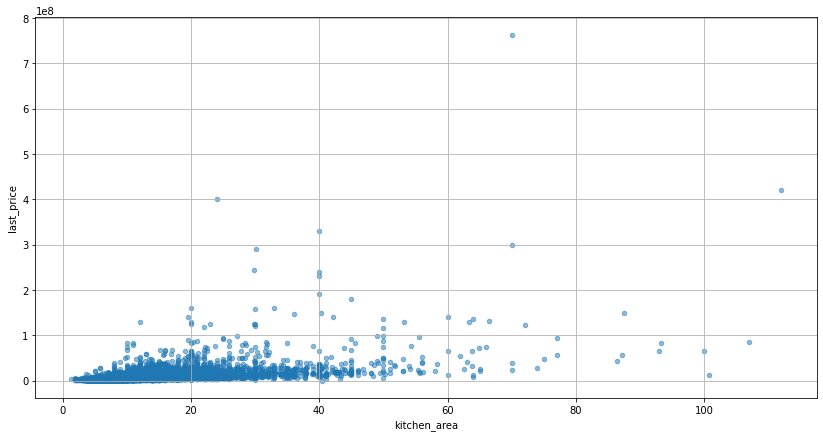

In [65]:
corr1('kitchen_area')

Корреляция еще меньше

Зависимость от количества комнат

Корелляция цены от rooms 0.3624657642217075


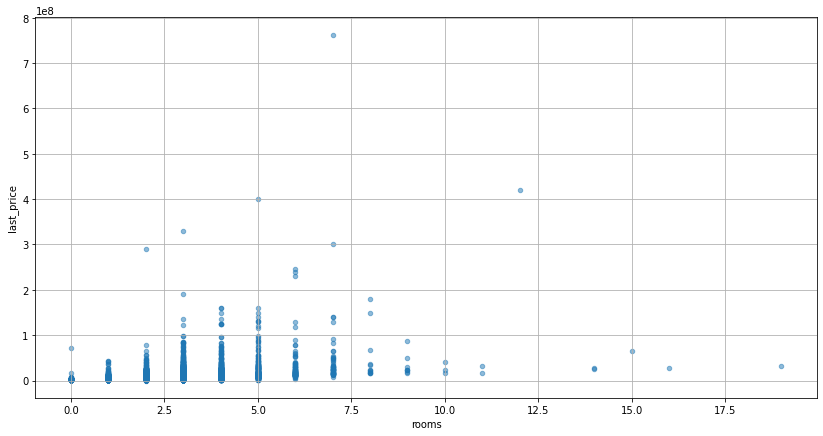

In [66]:
corr1('rooms')

Из графика видно , что зависимость цены от кол-ва комнат слабо прослеживается. Она увеличивается, при возрастании комнат от 1 до 5.  

Зависимость от этажа

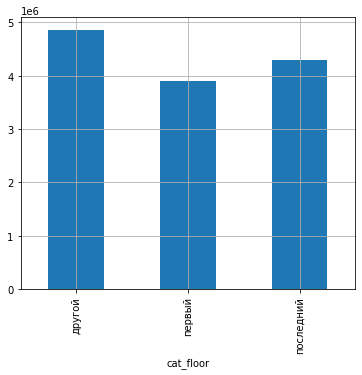

In [67]:
#Вычислим среднюю цену в каждой категории
cat_fl_median = data.groupby('cat_floor')['last_price'].median();
cat_fl_median.plot(x=cat_fl_median.index, y=cat_fl_median.values, kind='bar', grid=True, figsize=(6,5));

Первый этаж любят меньше всего - поэтому средняя цена ниже всех(чем меньше спрос, тем меньше цена). Более предпочтителен другой этах - не первый и не последний - на него цена выше.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Как в песне, "первый и последний этаж не предлагать". Традиционно, квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.
</div>

Для сравнения посмотрим зависимость в центре Питера

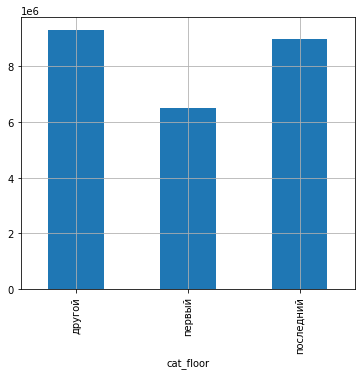

In [68]:
cat_center = data.query('cityCenters_km <= 8')
cat_fl_median = cat_center.groupby('cat_floor')['last_price'].median();
cat_fl_median.plot(x=cat_fl_median.index, y=cat_fl_median.values, kind='bar', grid=True, figsize=(6,5));

Здесь уже не такая явная разница между последним и другим этажом.

Зависимость от даты размещения (день недели, месяц, год).

Корелляция цены от weekday 0.0015551221223138985
Корелляция цены от month 0.002369604456574788
Корелляция цены от year -0.04235294897314374


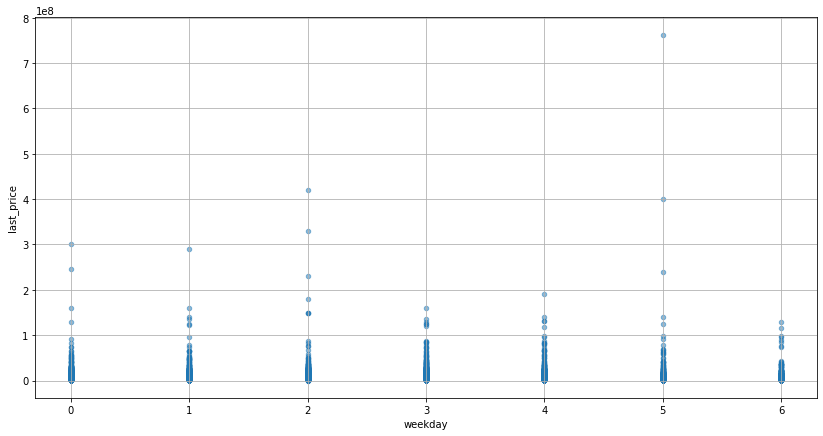

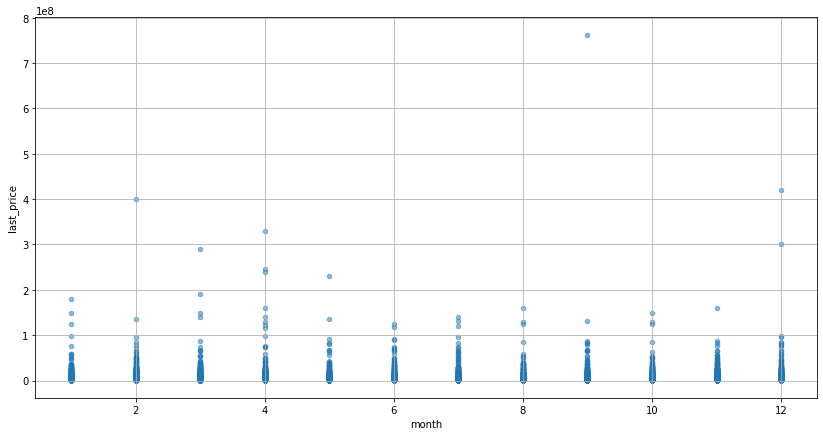

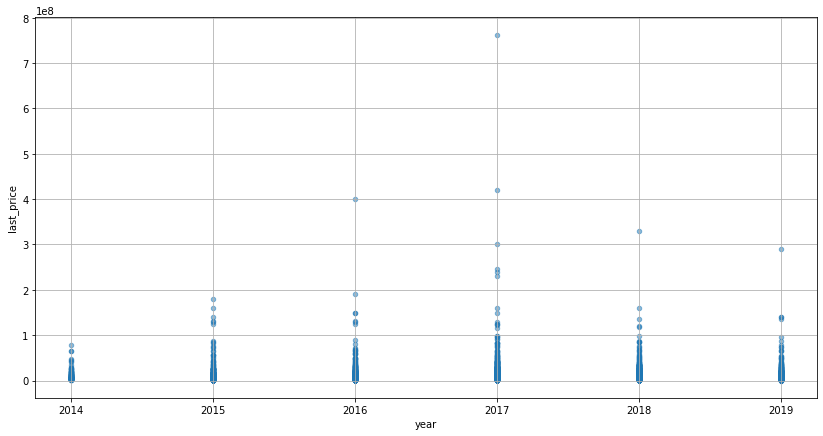

In [69]:
corr1('weekday')
corr1('month')
corr1('year')

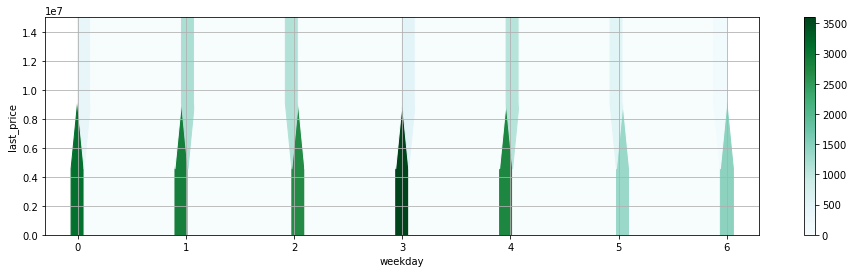

In [70]:
data.plot(x='weekday', y='last_price', kind='hexbin', gridsize=50, sharex=False, grid=True, figsize=(16,4),ylim=(0,15000000));

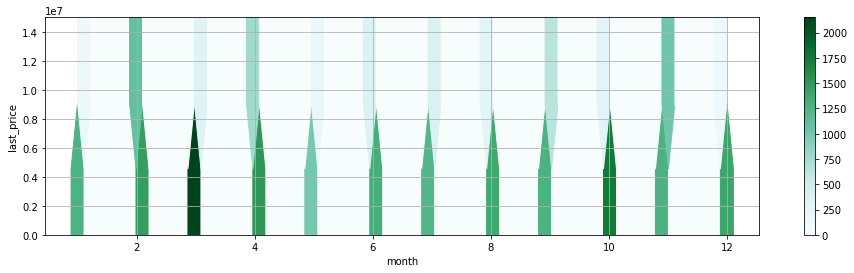

In [71]:
data.plot(x='month', y='last_price', kind='hexbin', gridsize=50, sharex=False, grid=True, figsize=(16,4),ylim=(0,15000000));

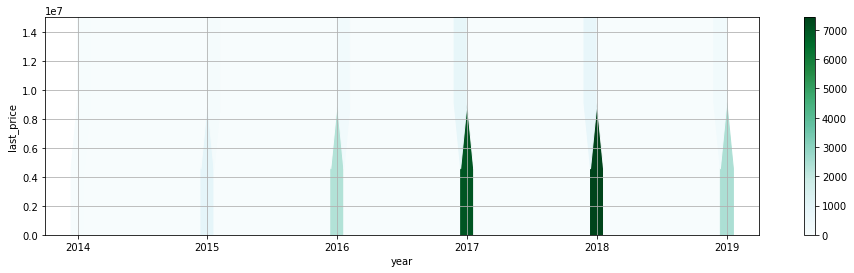

In [72]:
data.plot(x='year', y='last_price', kind='hexbin', gridsize=50, sharex=False, grid=True, figsize=(16,4),ylim=(0,15000000));

Цена не зависит от дня или месяца, чуть более коррелирует с годом (это и понятно - сказывается общее экономическое положение). Зато количество объявлений зависит и от дня недели, и от месяца, и от года.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Верная интерпретация полученных данных
</div>

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [73]:
loc10 = data.groupby('locality_name')['sqm_price'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
loc10.columns = ['flats', 'sqm_price']
loc10.reset_index(inplace=True)

print(loc10)
print()
print('ВЫВОД:')
print('Населённый пункт, где cамая низкая стоимость жилья')
print(loc10.loc[loc10['sqm_price']==loc10['sqm_price'].min()])
print()
print('Населённый пункт, где cамая высокая стоимость жилья')
print(loc10.loc[loc10['sqm_price']==loc10['sqm_price'].max()])

       locality_name  flats  sqm_price
0    Санкт-Петербург  15622 114,774.73
1     поселок Мурино    550  85,603.19
2     поселок Шушары    439  78,550.88
3         Всеволожск    397  68,718.85
4             Пушкин    369 103,125.37
5            Колпино    338  75,424.15
6  поселок Парголово    327  90,175.49
7            Гатчина    306  68,757.23
8    деревня Кудрово    299  92,473.09
9             Выборг    235  58,237.72

ВЫВОД:
Населённый пункт, где cамая низкая стоимость жилья
  locality_name  flats  sqm_price
9        Выборг    235  58,237.72

Населённый пункт, где cамая высокая стоимость жилья
     locality_name  flats  sqm_price
0  Санкт-Петербург  15622 114,774.73


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №2__

Таблица верна. Совет: на общие продажи лучше смотреть через призму медианы. Она более устойчива к выбросам
</div>

#### Вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

,sqm_price
cityCenters_km,
0.00,"172,619.00"
1.00,"128,571.00"
2.00,"123,035.00"
3.00,"108,401.00"
4.00,"118,079.00"
5.00,"126,929.50"
6.00,"131,611.50"
7.00,"126,624.00"
8.00,"122,599.50"


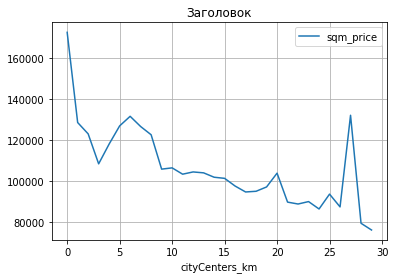

In [75]:
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_km !="nan"').pivot_table(index = 'cityCenters_km', values = 'sqm_price', aggfunc = 'median')
pivot_table_km.plot(grid = True, title = 'Заголовок')
pivot_table_km

По графику и по числам можно выделить 2 центральные зоны: центр (до 8км) и самый центр (1-2 км). Достаточно странно, что в зоне перехода из самого центра в центр цены очень резко снижаются. Возможно, это особенность застройки(промышленные зоны). Далее, до 26км цены плавно опускаются с небольшими пиками, а на 27км, видимо, расположена элитная застройка, т.к. цены на квартиры (или дома) в эом районе достигают цен на квартиры в центре. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Отличная визуализация. В твой код добавил заголовок и сетку, посмотри, пожалуйста, этот момент. Очень важно оформлять графики
</div>

### Общий вывод

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Отсутствует финальный вывод
</div>

<b>Срок продажи квартиры</b><br>

Чаще всего квартиру продают за 109 дней. Если меньше 46 дней, то это быстро, если дольше 242 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.<br>

<b>Факторы, влияющие на стоимость</b><br>
На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

<b>Стоимость квадратного метра в топ-10 населённых пунктов</b><br>
Дороже всего квадратный метр в Санкт-Петербурге - 114775
Дешевле всего квадратный метр в Выборге - 58237

<b>Факторы, влияющие на стоимость в центре Санкт-Петербурга</b><br>
В центре города практически нет разницы, насколько квартира удалена от условного центра города. 
В центре есть очень дорогие однокомнатные квартиры. Расположение квартиры на последнем этаже в центре города практически не влияет на цену.
Экономическая ситуация в стране мало влияла на элитную недвижимость в центре. 

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:


1) Проверка на дубликаты

2) Гистограмма по типу этажа

3) Отсутствует часть проекта: шаги 4.3 / 4.4 / 4.5

4) После каждого раздела / графика (или серии тестов) писать вывод по полученным данным с учетом поставленной бизнес задачи

5) Финальный вывод

6) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-info"> Так, вроде бы всё сохранил. :)

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №2__


В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
</div>

<div class="alert alert-info"> Александр, спасибо за ссылку! Про гитхаб тоже зашло, спасибо!))

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод